# SVM Baseline Model

In this notebook I will train a simple baseline sentiment classifier on the 
cleaned and balanced dataset (`balanced_reviews.csv`) using TF–IDF 
features and a Linear SVM. 

This provides a reference point before 
trying deep-learning or transformer-based models.

In [30]:
# imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

## Loading the cleaned balanced dataset

Here I load the preprocessed and balanced dataset created in `explore_data.ipynb`.  
It contains 120,000 reviews with three sentiment classes (negative, neutral, positive).

In [31]:
#Load data and check it is loading correctly
df = pd.read_csv("../data/balanced_reviews.csv")
df.shape

(120000, 2)

## Train–test split

Splitting the dataset into training and test sets so the SVM model can be 
evaluated on unseen data.

In [32]:
X = df["Text"]
y = df["Sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

len(X_train), len(X_test)

(96000, 24000)

## TF–IDF vectorisation

This step converts the review text into numerical features using a TF–IDF vectoriser.  
The transformed output is used as input for the SVM classifier.

In [33]:
vectorizer = TfidfVectorizer(
    max_features=50000,
    ngram_range=(1, 2),
    stop_words="english"
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape

((96000, 50000), (24000, 50000))

## Logistic Regression


In [34]:
# Extra imports for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Initialise the Logistic Regression classifier
model_lr = LogisticRegression(max_iter=1000, n_jobs=-1)

# Fit the model on the training data using TF-IDF features and labels
model_lr.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [36]:
# Predict the labels for the test set
y_pred_lr = model_lr.predict(X_test_tfidf)

In [37]:
# Print evaluation metrics for the test set
print("Accuacy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Create the confusion matrix for plotting
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr

Accuacy: 0.7626666666666667
              precision    recall  f1-score   support

    negative       0.78      0.77      0.78      8000
     neutral       0.70      0.70      0.70      8000
    positive       0.81      0.81      0.81      8000

    accuracy                           0.76     24000
   macro avg       0.76      0.76      0.76     24000
weighted avg       0.76      0.76      0.76     24000



array([[6190, 1371,  439],
       [1332, 5616, 1052],
       [ 450, 1052, 6498]])

## Confusion Matrix (Logistic Regression)

The confusion matrix shows the number of correct and incorrect predictions for each class, made my the SVM.

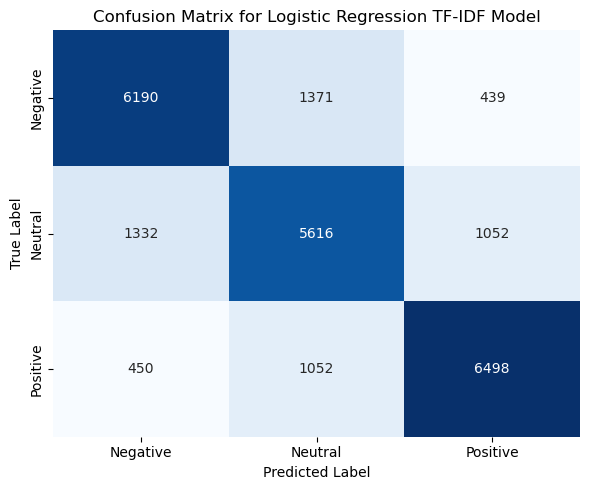

In [38]:
# Plot the confusion matrix counts
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_lr,
    annot= True,
    fmt='d',
    cmap='Blues',
    cbar=False,
    xticklabels=['Negative', 'Neutral', 'Positive'],
    yticklabels=['Negative', 'Neutral', 'Positive']
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression TF-IDF Model')
plt.tight_layout()
plt.show()

## Normalised confusion matrix (Logistic Regression)
The normalised confusion matrix shows the proportion of predictions for each true class, this is helpful to understand how well the model performs across different classes, especially in imbalanced datasets.

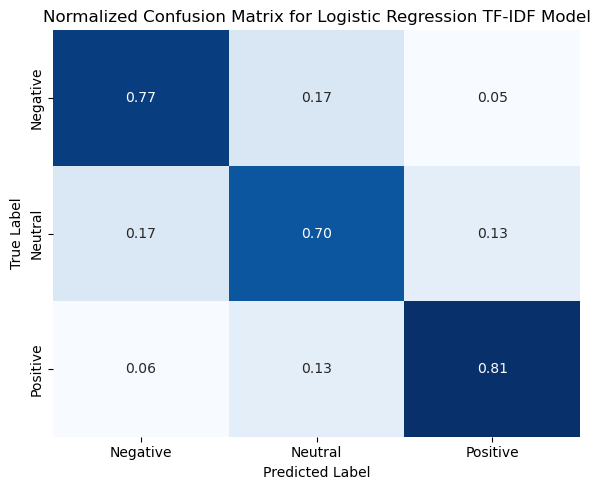

In [39]:
# Create a normalised confusion matrix for plotting with the rows normalised by the true labels
cm_lr_norm = confusion_matrix(y_test, y_pred_lr, normalize='true')

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_lr_norm,
    annot= True,
    fmt='.2f',
    cmap='Blues',
    cbar=False,
    xticklabels=['Negative', 'Neutral', 'Positive'],
    yticklabels=['Negative', 'Neutral', 'Positive']
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix for Logistic Regression TF-IDF Model')
plt.tight_layout()
plt.show()

# Linear SVM Baseline (TF-IDF Features)
A linear SVM classifier is trained using TF-IDF features to establish a baseline performance for sentiment analysis on the dataset.

In [40]:
from sklearn.svm import LinearSVC

In [ ]:
# Initialize the Linear SVC classifier
model_svm = LinearSVC()

# Fit the model on the training data using TF-IDF features and labels
model_svm.fit(X_train_tfidf, y_train)

In [ ]:
# Predict the labels for the test set
y_pred_svm = model_svm.predict(X_test_tfidf)

In [ ]:
# Print evaluation metrics for the test set
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Create the confusion matrix for plotting
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

Accuacy: 0.763625
              precision    recall  f1-score   support

    negative       0.77      0.78      0.78      8000
     neutral       0.71      0.69      0.70      8000
    positive       0.81      0.82      0.81      8000

    accuracy                           0.76     24000
   macro avg       0.76      0.76      0.76     24000
weighted avg       0.76      0.76      0.76     24000



array([[6277, 1256,  467],
       [1376, 5529, 1095],
       [ 474, 1005, 6521]])

## Confusion Matrix (Linear SVM)
 The confusion matrix shows the number of correct and incorrect predictions made by the Linear SVM model on the test set.

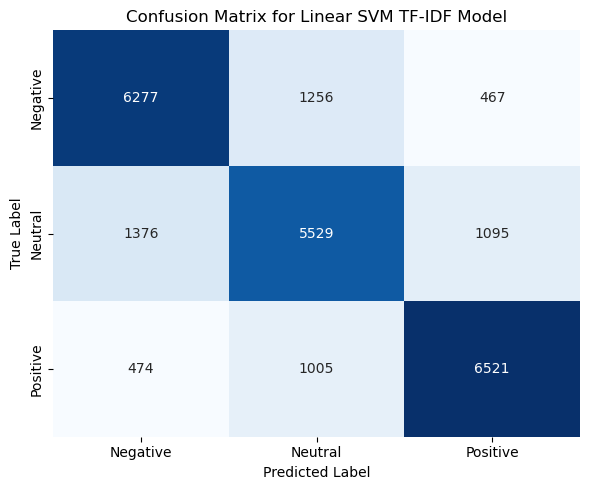

In [ ]:
# Plot the confusion matrix counts
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_svm,
    annot= True,
    fmt='d',
    cmap='Blues',
    cbar=False,
    xticklabels=['Negative', 'Neutral', 'Positive'],
    yticklabels=['Negative', 'Neutral', 'Positive']
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Linear SVM TF-IDF Model')
plt.tight_layout()
plt.show()

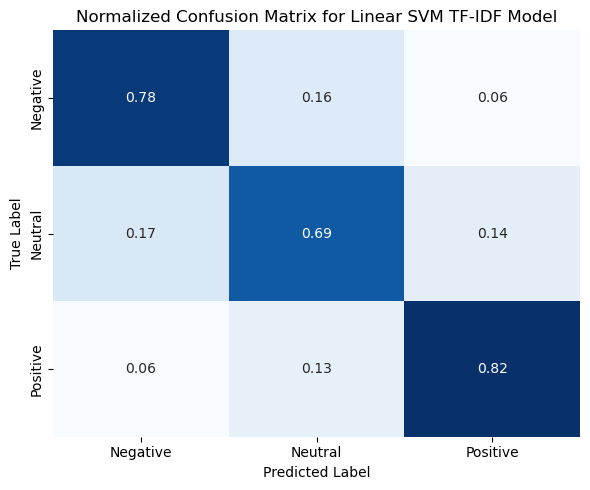

In [ ]:
## Normalised confusion matrix (Linear SVM)
cm_svm_norm = confusion_matrix(y_test, y_pred_svm, normalize='true')

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_svm_norm,
    annot= True,
    fmt='.2f',
    cmap='Blues',
    cbar=False,
    xticklabels=['Negative', 'Neutral', 'Positive'],
    yticklabels=['Negative', 'Neutral', 'Positive']
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix for Linear SVM TF-IDF Model')
plt.tight_layout()
plt.show()

## Baseline model comparison
A small summary table to compare the two baseline model performances while using the same TF-IDF features.

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# Calculate F1 scores for both models
lr_f1_macro = f1_score(y_test, y_pred_lr, average='macro')
svm_f1_macro = f1_score(y_test, y_pred_svm, average='macro')

# Calculate accuracy for both models
lr_accuracy = accuracy_score(y_test, y_pred_lr)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Build comparison dataframe
comparison_df = pd.DataFrame(
    [
        {'Model': 'Logistic Regression', 'F1 Macro': lr_f1_macro, 'Accuracy': lr_accuracy},
        {'Model': 'Linear SVM', 'F1 Macro': svm_f1_macro, 'Accuracy': svm_accuracy}
    ]
)

# Display results, rounded for readability
comparison_df.round(4)

,Model,F1 Macro,Accuracy
0,Logistic Regression,0.7627,0.7627
1,Linear SVM,0.7632,0.7636


In [ ]:
# Save comparison results to CSV for easy access later
comparison_df.to_csv("../results/svm_vs_logreg_comparison.csv", index=False)